### Статистика
Темы сегодняшнего семинара с практической точки зрения:
 - Понятие генеральной совокупности и выборки, репрезентативность выборки 
 - Простая случайная выборка
 - Стратифицированная выборка
 - Типы переменных
 - Количественные переменные
 - Номинативные переменные
 - Ранговые переменные
 - Понятие описательной статистики
 - Мода
 - Медиана
 - Среднее значение
 - Понятие меры изменчивости данных
 - Размах
 - Дисперсия, стандартное отклонение
 - Свойства дисперсии и стандартного отклонения
 - Выбор меры центральной тенденции
 - Свойства среднего
 - Квантили распределения
 - Квартили
 - Box plot
 - Понятие нормального распределения
 - Стандартизация
 - Правила двух и трех сигм, использование стандартизации
 - ЦПТ
 - Статистическая проверка гипотез
 - Идея статистического вывода
 - p-уровень значимости и его интерпретация
 - Сравнение двух средних
 - t-критерий Стьюдента
 - Построение графиков
 - Сравнение распределения с нормальным
 - QQ-Plot
 - Проблема выбросов
 - U-критерий Манна-Уитни

### Ну что. Начнем?

In [118]:
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv('train.csv')

In [68]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
### Случайная выборка
tmp = data.sample(100)

In [70]:
data.MSZoning.value_counts() / data.shape[0]

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: count, dtype: float64

In [71]:
tmp.MSZoning.value_counts() / tmp.shape[0]

MSZoning
RL         0.75
RM         0.20
FV         0.03
C (all)    0.01
RH         0.01
Name: count, dtype: float64

In [72]:
### Стратификация

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
_, tmp = train_test_split(data, test_size=100/len(data), stratify=data['MSZoning'])

In [75]:
tmp.MSZoning.value_counts() / tmp.shape[0]

MSZoning
RL         0.79
RM         0.15
FV         0.04
RH         0.01
C (all)    0.01
Name: count, dtype: float64

In [76]:
tmp.shape

(100, 81)

### Типы переменных

#### Количественные
виды:
1. Количественные (непрерывные и дискретные)
2. Номинативные (категориальные)
3. Ранговые

In [ ]:
### Категориальная
# MSZoning: Identifies the general zoning classification of the sale.
    #    A	Agriculture
    #    C	Commercial
    #    FV	Floating Village Residential
    #    I	Industrial
    #    RH	Residential High Density
    #    RL	Residential Low Density
    #    RP	Residential Low Density Park 
    #    RM	Residential Medium Density
data.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [ ]:
### Непрерывная
data.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [92]:
# OverallQual: Rates the overall material and finish of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor

data.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [94]:
# Fireplaces: Number of fireplaces
data.Fireplaces.unique()

array([0, 1, 2, 3])

### Описательная статистика

<Axes: >

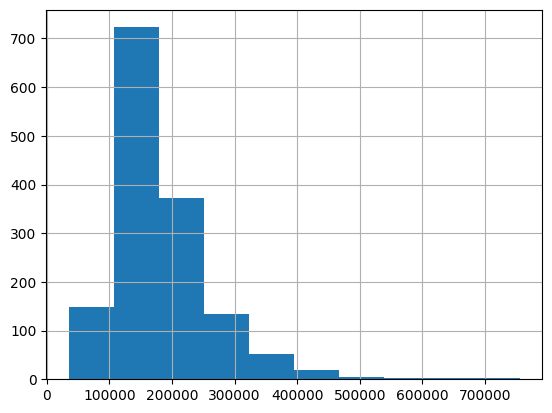

In [108]:
data.SalePrice.hist(bins=10)

In [105]:
### Гистограмма частот
import seaborn as sns

<Axes: xlabel='SalePrice', ylabel='Count'>

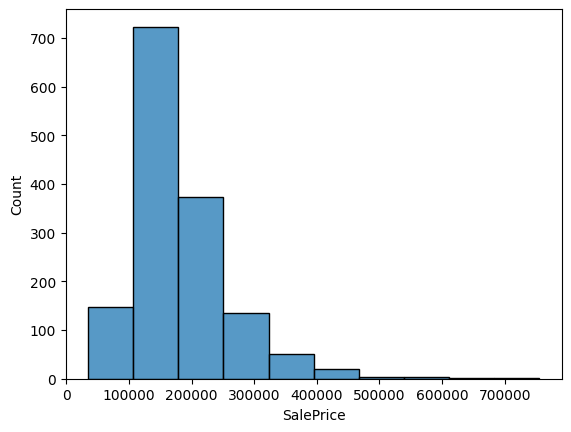

In [ ]:
sns.histplot(data.SalePrice, bins=10)

<Axes: xlabel='OverallCond', ylabel='Count'>

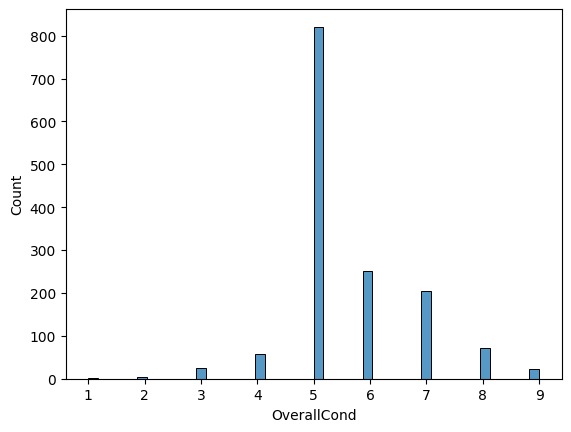

In [112]:
sns.histplot(data.OverallCond)

In [117]:
### Мода
data.SalePrice.value_counts().index[0]

np.int64(140000)

In [119]:
### Мода
data.SalePrice.mode()

0    140000
Name: SalePrice, dtype: int64

In [ ]:
### Медианы
data.SalePrice.median()

np.float64(163000.0)

In [122]:
### Средние
data.SalePrice.mean()

np.float64(180921.19589041095)

In [62]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [63]:
tmp2 = stratified_sample_df(data, 'MSZoning', 100)

/var/folders/kb/t561rkyd3mb6kgy6nj339lwc0000gn/T/ipykernel_58400/1520585990.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ = df.groupby(col).apply(lambda x: x.sample(n))


In [64]:
tmp2.MSZoning.value_counts() / tmp2.shape[0]

MSZoning
C (all)    0.2
FV         0.2
RH         0.2
RL         0.2
RM         0.2
Name: count, dtype: float64

In [65]:
data.MSZoning.value_counts() 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64